# The purpose of this application is to produce Ternary scatter graphs regarding rock and mineral geochemical data. 

# Functions

import_data()  
import_data_drive()  
unique_values()  
ternary_plot()

In [1]:
#@title LIBRARIES N MOUNT DRIVE { form-width: "100px" }
### LIBRARIES ###

import pandas as pd
import numpy as np
import os

To access someone's else file, ask to a share license, 
and create a shortcut from 'shared with me' to MyDrive.
This way you can access your directories like this: 'drive/MyDrive/Paste'

In [2]:
#@title import_data() { form-width: "100px" }
def import_data_drive():
  from googleapiclient.http import MediaFileUpload
  from google.colab import drive
  from google.colab import files
  ''' when working on Colab ...
  returns a dataFrame, store in a variable'''
  path = 'drive/MyDrive/' + input('drive/MyDrive/...')
  print('\nFILES:')
  display(os.listdir(f'{path}'))
  print()
  fileName = input('file name: ') 
  xls = pd.ExcelFile(f'{path}/{fileName}') # stores excel file
  print('\nSHEETS: ')
  display(xls.sheet_names) # list sheets
  print()
  sheet = input('load sheet: ') # select sheet
  database = pd.read_excel(f'{path}/{fileName}', sheet_name = sheet) # get data
  print()
  print(f'Data sample:\n{database.head()}') # display sample of data

  print(f'\nfile path = {path}/{fileName}', sep = '')

  print('\nImport successful!')
  return database # to store in a var

In [3]:
def import_data(path = None):
    '''returns a dataFrame, store in a variable
    path: the directory where the file is, the function returns the files within the paste'''
    
    pwd = %pwd # print working directory

    if path == None:
        path = input(f'{pwd}\:')
        path = f'{pwd}\{path}'
    print('\nFILES:')
    display(os.listdir(f'{path}'))
    print()
    fileName = input('file name: ') 
    xls = pd.ExcelFile(f'{path}/{fileName}') # stores excel file
    print('\nSHEETS: ')
    display(xls.sheet_names) # list sheets
    print()
    sheet = input('load sheet: ') # select sheet
    database = pd.read_excel(f'{path}/{fileName}', sheet_name = sheet) # get data
    print()
    print(f'Data sample:\n{database.head()}') # display sample of data

    print(f'\nfile path = {path}/{fileName}', sep = '')

    print('\nImport successful!')
    return database # to store in a var

In [4]:
#@title unique_values() { form-width: "100px" }
def unique_values(dbcolumn):
  '''# CHECK UNIQUE VALUES OF A COLUMN #'''
  print(set(dbcolumn))

In [33]:
#@title ternary_plot() { form-width: "100px"}
def ternary_plot(x, y, z, color = None, 
                 non_num = None, discrete_colors = {}, 
                 barvar = None, cmapcolor = None, vmin = None, vmax = None,
                 label = False, grid = False, 
                 fields = None, frame = (10,10),
                 axis_label=None, s=120, title=None,
                 title_fontsize=12, fontsize=12, frameon=False, alpha=1
                 ):
  ''' 
  ternary plot, first of all, normalizes the 3D coordinates, and 
  re-normalizes x,y coordinates between themselves
  so, it passes the normalized data as (X,Y) coordinates to be plotted 
  within a triangle
  
  color:  a unique color for every data

  non_num:  a non-numeric variable that can be classified by a discrete list 
            of colors

  discrete_colors:  a dictionary that carries each unique value of 
                    non_num *arg with its respective color
  
  barvar: the column(var) that goes on the continuous colorbar
            e.g., a fourth element

  vmax, vmin: max and min of color bar

  cmapcolor:  cmap pattern ('viridis', 'plasma', 'inferno', 'magma', 'cividis', 
              'jet', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
              'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
              'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper')

  label:  which column data to be plotted as a label por point

  grid: default = False

  fields: 'chromite' for chromite classification ternary (Cr, Al, Fe)
          'asbolane' for asbolane-lithiphorite ternary (Al, Ni, Co)
  
  frame: sets the size of the output image
  
  axis_label: receives a tuple with the Axes' names to be writen on the ternary, 
  where: (x,y,z) --> (left, right, upper); the default will return the Column.name

  s: float or array-like, shape (n, ), optional
  The marker size in points**2

  LEGEND:
  title: string
  title_fontsize: title
  frameon: boolena to plot a frame outside legend
  fontsize: size of the legend description itself.
  shadow: shadow under the legend
  '''
  ### DEFINING NORMALIZATION FUNC ###
  def normalization(x,y,z):
      sum_norm = []
      x_norm = []
      y_norm = []
      z_norm = []

      for i in range(0, len(x)):
        sum_norm.append(x[i] + y[i] + z[i])

      for i in range(0, len(x)):
        x_norm.append(x[i]/sum_norm[i])
        y_norm.append(y[i]/sum_norm[i])
        z_norm.append(z[i]/sum_norm[i])
      return x_norm, y_norm, z_norm

      #print(x[0], y[0],  z[0], sum_norm[0])

  import matplotlib.pyplot as plt
  import matplotlib.lines as lines
  import matplotlib.patches as mpatches
  
  ### NORMALIZATION OF 3D COORDINATES ###
  x_norm, y_norm, z_norm = normalization(x,y,z)
  
  ### 3D to 2D coordinates ###
  X = []
  Y = []
  X.clear()
  Y.clear()
  for i in range(0,len(z_norm)):
    Y.append(z_norm[i])

  for i in range(0, len(x_norm)):
    X.append(((y_norm[i]/(x_norm[i] + y_norm[i])) * (1-Y[i])) + 0.5*Y[i])
      # normalizing x n y again for the X axis, multiply for the complement of 
      # Y axis to adjust to triangle, so add a displacement proportional to Y

  ### setting some ternary ploting configs like ternaty height h 
  h = (((3**(1/2)))/(2))+0.012

  #print(h)

  ### PLOT SIZE ###
  if cmapcolor != None:
    fig = plt.figure(figsize =(frame[0]+2,frame[1]*h))
    fig, ax = plt.subplots(1, figsize =(frame[0]+2,frame[1]*h), facecolor='white')
  else:
    fig = plt.figure(figsize =(frame[0],frame[1]*h))
    fig, ax = plt.subplots(1, figsize =(frame[0],frame[1]*h), facecolor='white')
  
  ### TERNARY BOARDER ###
  triangle = ((0.0, 0.5, 1, 0), (0.001, 1, 0.001, 0.001))
  ax.plot(triangle[0],triangle[1], '-', color = 'black', linewidth = '1.2')

  ### TERNARY GRID ###
  if grid == True:
    grid = {'hgrid' : ((0.05, 0.95, 0.9, 0.1, 0.15, 0.85, 0.8, 0.2, 0.25, 0.75, 0.7, 0.3, 0.35, 0.65, 0.6, 0.4, 0.45, 0.55),
                    (0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9)),
            'xgrid' : ((0.05, 0.1, 0.2, 0.1, 0.15, 0.3, 0.4, 0.2, 0.25, 0.5, 0.6, 0.3, 0.35, 0.7, 0.8, 0.4, 0.45, 0.9, 1),
                    (0.1, 0, 0, 0.2, 0.3, 0, 0, 0.4, 0.5, 0, 0, 0.6, 0.7, 0, 0, 0.8, 0.9, 0, 0)),
            'ygrid' : ((0.1, 0.55, 0.6, 0.2, 0.3, 0.65, 0.7, 0.4, 0.5, 0.75, 0.8, 0.6, 0.7, 0.85, 0.9, 0.8, 0.9, 0.95),
                    (0, 0.9, 0.8, 0, 0, 0.7, 0.6, 0, 0, 0.5, 0.4, 0, 0, 0.3, 0.2, 0, 0, 0.1))}
    for i in grid.keys():
      ax.plot(grid[i][0], grid[i][1], '-',color = 'black', linewidth = '0.2', alpha = 0.5)

  ### CHROMITE FIELDS ###

  if fields == 'chromite':
    hfields = ((0.125, 0.875, 0.75, 0.25, 0.375, 0.625),
              (0.25, 0.25, 0.5, 0.5, 0.75, 0.75))
    ax.plot(hfields[0], hfields[1], '--',color = 'black', alpha = 0.7, linewidth = '1')

    vfields = ((0.25, 0.375, 0.625, 0.75, 0.5, 0.5),
              (0, 0.25, 0.25, 0, 0, 0.75))
    ax.plot(vfields[0], vfields[1], '--',color = 'black', alpha = 0.7, linewidth = '1')
    
    field_label = (('Magnetite', 'Cr-magnetite', 'Al-magnetite', 'Ferrian chromite', 'Ferrian pickotite', 'Pickotite', 'Hercynite', 'Chromite', 'Al-chromite'),
                   (0.5, 0.4, 0.6, 0.37, 0.63, 0.6, 0.82, 0.18, 0.4),
                   (0.85, 0.6, 0.6, 0.4, 0.4, 0.1, 0.1, 0.1, 0.1,))

    for i, l in enumerate(field_label[0]):
        ax.annotate(l, xy=(field_label[1][i], field_label[2][i]), xytext=(field_label[1][i], field_label[2][i]),
                  arrowprops=None, ha='center', va='center', rotation= 0, size=12)
        
  ### ASBOLANE-LITHIOPHORITE FIELDS ###

  if fields == 'asbolane':
    asbolane = ((0.45, 0.9, 1, 0.75, 0.675), (0.9, 0, 0,0.5, 0.45))
    ax.plot(asbolane[0], asbolane[1], '-',color = 'black', linewidth = '1')

    ax.annotate('Lithiophorite', xy=(0.08, 0.05), xytext=(0.3, 0.2),
                arrowprops=dict(arrowstyle='->'), ha='center', va='center', rotation= 0, size=15)
    ax.annotate('Co-rich', xy=(0.6, 0.7), xytext=(0.6, 0.7),
                arrowprops=None, ha='center', va='center', rotation= -60, size=15)
    ax.annotate('Ni-rich', xy=(0.83, 0.24), xytext=(0.83, 0.24),
                arrowprops=None, ha='center', va='center', rotation= -60, size=15)
    ax.annotate('Asbolane', xy=(0.925, 0.24), xytext=(0.78, 0.53),
                arrowprops=None, ha='center', va='center', rotation= -60, size=15)
    
  ### MG SILICATES FIELDS ###

  if fields == 'mgsilicates':
    mgsilicates = ((0.875, 0.215, 0.305, 0.81, 0.8, 0.315), (0.25, 0.43, 0.61, 0.38, 0.4, 0.635))
    ax.plot(mgsilicates[0], mgsilicates[1], '--',color = 'black', linewidth = '1')

    ax.annotate('serpentine series', xy=(0.08, 0.05), xytext=(0.23, 0.425),
                arrowprops=None, ha='left', va='center', rotation= -13, size=8)
    ax.annotate('talc series', xy=(0.08, 0.05), xytext=(0.31, 0.575),
                arrowprops=None, ha='left', va='center', rotation= -21, size=8)
    ax.annotate('sepiolite series', xy=(0.08, 0.05), xytext=(0.33, 0.62),
                arrowprops=None, ha='left', va='center', rotation= -22, size=8)


  # points label #
  if bool(label) == True:
    annotations = label
    for i, label in enumerate(annotations):
        plt.annotate(label, (0.02 + X[i], 0.02 + Y[i]), fontsize = 14, weight = 'normal')

  ### CONFIG ###
  plt.ylim(0, 1)
  plt.xlim(0, 1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.axis('off')  # command for hiding the axis.


  ### ANNOTATE ###
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html
  # annotate axis labels #
  if axis_label != None:
    axis_lab = ((axis_label[0], axis_label[1], axis_label[2]),
                  (0, 1, 0.5),
                  (-0.04, -0.04, 1.035))
  else:
    axis_lab = ((x.name, y.name, z.name),
                  (0, 1, 0.5),
                  (-0.04, -0.04, 1.035))


  for i, l in enumerate(axis_lab[0]):
    ax.annotate(l, xy=(axis_lab[1][i], axis_lab[2][i]), xytext=(axis_lab[1][i], axis_lab[2][i]),
              arrowprops=None, ha='center', va='center', rotation= 0, size=20, annotation_clip = False)

  ### PLOT ###
  if color != None:
    plt.scatter(X, Y, s = s, alpha = alpha, c = color, edgecolors = 'black')

  elif type(non_num) != type(None):
    plt.scatter(X, Y, s = s, alpha = alpha, c = non_num.map(discrete_colors), edgecolors = 'black')
    patches = [ mpatches.Patch(color=c, label=g) for g,c in discrete_colors.items() ]
    plt.legend(handles=patches, loc='upper left', ncol=1, frameon = True, 
               title = title, title_fontsize = title_fontsize, edgecolor = 'black', fontsize = fontsize, shadow=True) #bbox_to_anchor=(0.1,0.9)


  elif cmapcolor != None:
    plt.scatter(X, Y, s = s, alpha = alpha, c = list(barvar), cmap = cmapcolor , edgecolors = 'black', vmax=vmax, vmin=vmin) # 'inferno' 'jet'
    cb = plt.colorbar()
    cb.set_label(barvar.name, color= 'black', fontsize = 18)

  else: 
    plt.scatter(X, Y, s = s, alpha = alpha, c = 'black', edgecolors = 'black')
    


  ### SAVE FIG ###
  # save_fig = input('save? (y/n)')
  # if save_fig == 'y':
  #   fname = input('file name: ')
  #   plt.savefig(f'{fname}.png', transparent=False)
  #   files.download(f'{fname}.png')
  # else: pass

  plt.show()


# Run
---

# Project

In [21]:
chromite = import_data()


FILES:


['.git',
 'data',
 'images',
 'README.md',
 'ternary_mineral_classif_1.0.ipynb',
 'ternary_mineral_classif_1.1.ipynb',
 'ternary_mineral_classif_1.2.ipynb',
 'ternary_plot.ipynb']

PermissionError: [Errno 13] Permission denied: 'c:\\Repositories\\ternaryplot-minerals\\/'

In [ ]:
unique_values(chromite['source'])

{'BS-2', 'BC-2', 'JC'}


<Figure size 864x758.614 with 0 Axes>

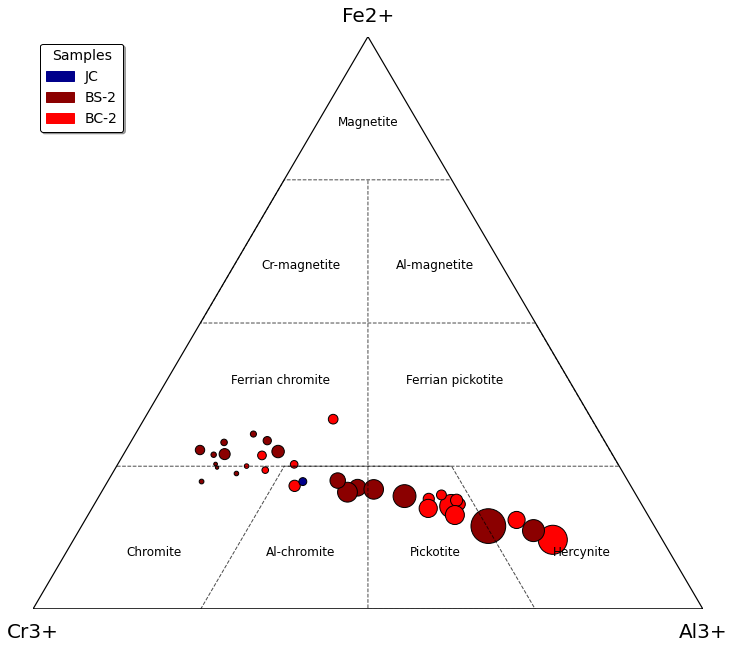

In [ ]:
legenda = {'JC':'darkblue', 'BS-2':'darkred', 'BC-2':'red'}

ternary_plot(chromite['Cr'], chromite['Al'], chromite['Fe'],
             s= 6000 * ((chromite['Mg'])**4),
             non_num = chromite['source'], 
             discrete_colors = legenda, 
             label=False, 
             grid=False, 
             fields='chromite', 
             frame=(12,12),
             axis_label=('Cr3+', 'Al3+', 'Fe2+'),
             title = 'Samples',
             title_fontsize = 14,
             frameon = True,
             fontsize = 14,
)

<Figure size 1008x695.396 with 0 Axes>

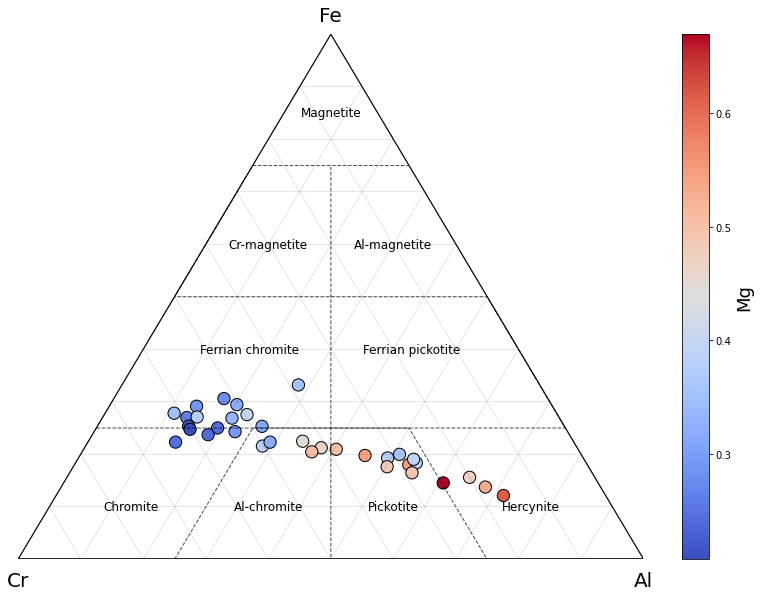

In [ ]:
ternary_plot(chromite['Cr'], chromite['Al'], chromite['Fe'], 
             s = 150,
             barvar=chromite['Mg'], 
             cmapcolor='coolwarm', 
             fields = 'chromite',
             grid=True,
             frame= (12,11),
             vmax = None,
             vmin = None)

In [ ]:
asbolane = import_data()
unique_values(asbolane['source'])


FILES:


['Analises_MEV-EDS_Vivian.xlsx', 'oxide_to_mol_model.xlsx']



SHEETS: 


['CHROMITE', 'ASBOLANE-LITHIOPHORITE', 'chromite_oxide', 'chromite_mol']



Data sample:
  source         size                 mineral  id        Si        Al  \
0   BC-2  0.25x0.18mm  Asbolane-lithiophorite  10  0.810671  6.844873   
1   BC-2  0.25x0.18mm  Asbolane-lithiophorite  11  0.851004  6.345130   
2   BC-2  0.25x0.18mm                asbolane  16  0.735492  2.154758   
3   BC-2  0.25x0.18mm                asbolane  17  0.842905  2.113092   
4   BC-2  0.25x0.18mm                asbolane  18  1.409797  2.550828   

         Ca   Ti        Cr         Mn  ...        Sum  Unnamed: 17  \
0  0.224166  0.0  0.567581  27.441844  ...  64.202281          NaN   
1  0.083514  0.0  0.427818  20.355941  ...  51.737442          NaN   
2  0.158018  0.0  0.000000  24.203991  ...  55.605156          NaN   
3  0.140960  0.0  0.000000  24.604785  ...  56.023803          NaN   
4  0.000000  0.0  0.000000  22.828527  ...  54.239159          NaN   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
0          NaN          NaN          NaN          NaN  

<Figure size 864x758.614 with 0 Axes>

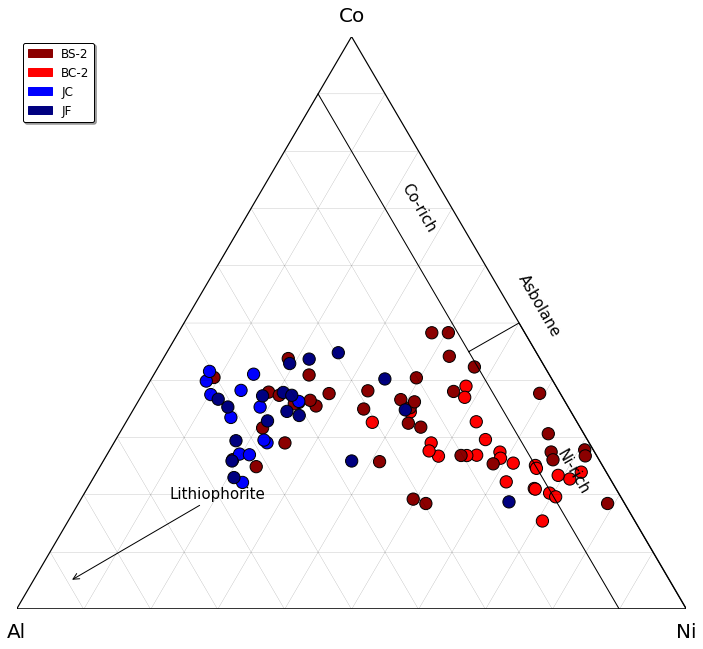

In [ ]:
leg_asb = {'BS-2': 'darkred', 'BC-2':'red', 'JC': 'blue', 'JF':'navy'}
ternary_plot(asbolane['Al'], asbolane['Ni'], asbolane['Co'],
             s = 150, 
             color=None, 
             non_num = asbolane['source'], 
             discrete_colors=leg_asb, 
             barvar=None, 
             cmapcolor=None, 
             label=False, 
             grid=True, 
             fields='asbolane',
             frame = (12,12)
             )

0.8780254037844386
save? (y/n)y
file name: asbolane_biocobalt_byMn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1008x695.396 with 0 Axes>

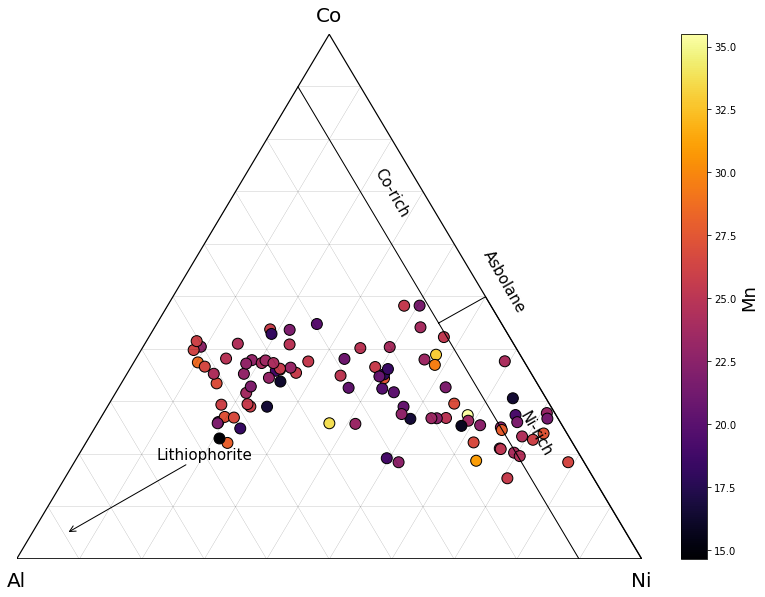

In [ ]:
ternary_plot(asbolane['Al'], asbolane['Ni'], asbolane['Co'], 
             color=None, 
             non_num = None, 
             discrete_colors=None, 
             barvar= asbolane['Mn'], 
             cmapcolor= 'inferno', 
             label=False, 
             grid=True, 
             fields='asbolane',
             frame = (12,11))

# Clay Minerals Sim

In [ ]:
clay = import_data()

In [ ]:
clay['FEO'] = clay['FEOT']
display(clay.head())

,SAMPLE NAME,MINERAL,PRIMARY/SECONDARY,SIO2,TIO2,AL2O3,FEOT,CAO,MGO,MNO,K2O,NA2O,FEO
0,"samp. 183-1138A-87R-1, 4-9",SMECTITE,secondary,69.04,0.00,15.25,0.08,4.55,0.00,0.00,0.42,0.39,0.08
1,samp. PAL1,PALAGONITE,primary,68.51,0.60,11.05,0.37,3.45,0.70,0.00,1.60,0.13,0.37
2,samp. PALB,PALAGONITE,primary,67.18,3.12,9.38,2.02,3.62,0.62,0.08,0.95,0.07,2.02
3,samp. N2.1,SMECTITE,secondary,66.40,0.00,1.40,0.30,5.80,4.40,0.00,0.90,9.40,0.30
4,samp. PAL1,PALAGONITE,primary,63.60,1.14,9.54,0.70,2.88,0.47,0.02,4.92,1.18,0.70


In [ ]:
clay.drop(columns = ('FEOT'), inplace=True)
display(clay)

,SAMPLE NAME,MINERAL,PRIMARY/SECONDARY,SIO2,TIO2,AL2O3,CAO,MGO,MNO,K2O,NA2O,FEO
0,"samp. 183-1138A-87R-1, 4-9",SMECTITE,secondary,69.04,0.00,15.25,4.55,0.00,0.00,0.42,0.39,0.08
1,samp. PAL1,PALAGONITE,primary,68.51,0.60,11.05,3.45,0.70,0.00,1.60,0.13,0.37
2,samp. PALB,PALAGONITE,primary,67.18,3.12,9.38,3.62,0.62,0.08,0.95,0.07,2.02
3,samp. N2.1,SMECTITE,secondary,66.40,0.00,1.40,5.80,4.40,0.00,0.90,9.40,0.30
4,samp. PAL1,PALAGONITE,primary,63.60,1.14,9.54,2.88,0.47,0.02,4.92,1.18,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...
583,samp. 86/83,PALAGONITE,secondary,21.95,1.49,14.52,2.09,0.67,0.71,0.07,0.23,15.38
584,samp. 86/22,CLAY MINERAL,secondary,21.60,3.18,17.90,0.34,0.28,0.95,0.01,0.05,0.00
585,samp. A7-51-20,MONTMORILLONITE,secondary,21.50,2.90,6.40,22.50,1.10,0.00,1.66,1.85,17.30
586,samp. PALB,PALAGONITE,primary,20.32,2.73,21.03,0.26,0.11,0.00,0.09,0.30,12.98


In [ ]:
display(clay[clay['MINERAL'] == ('SMECTITE' or 'NONTRONITE')])

,SAMPLE NAME,MINERAL,PRIMARY/SECONDARY,SIO2,TIO2,AL2O3,CAO,MGO,MNO,K2O,NA2O,FEO
0,"samp. 183-1138A-87R-1, 4-9",SMECTITE,secondary,69.04,0.00,15.25,4.55,0.00,0.00,0.42,0.39,0.08
3,samp. N2.1,SMECTITE,secondary,66.40,0.00,1.40,5.80,4.40,0.00,0.90,9.40,0.30
37,"samp. 129-801B-41R-1,130-136",SMECTITE,secondary,55.61,0.16,14.00,0.71,4.52,0.00,1.19,1.27,8.92
39,"samp. 129-801C-1R-1,14-20",SMECTITE,secondary,55.17,0.01,2.20,0.52,20.98,0.00,0.61,0.18,11.98
42,"samp. 129-801B-41R-1,130-136",SMECTITE,secondary,54.96,0.17,13.45,0.86,4.73,0.03,1.45,1.47,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...
552,"samp. 129-800A-58R-2,67-73",SMECTITE,secondary,30.15,0.06,11.35,0.20,14.31,0.27,0.15,0.34,30.52
569,"samp. 129-801C-6R-4,49-54",SMECTITE,secondary,26.16,0.43,4.69,1.09,12.99,0.16,0.89,0.10,26.65
570,samp. N2.1,SMECTITE,secondary,25.90,0.20,16.30,3.50,0.40,0.00,0.60,5.10,9.30
571,"samp. 129-801C-6R-4,49-54",SMECTITE,secondary,25.86,0.41,4.05,2.06,9.71,0.07,0.61,1.41,31.25


In [ ]:
unique_values(clay['MINERAL'])
mask = (clay['MINERAL'] == 'SMECTITE') | (clay['MINERAL'] == 'CORRENSITE') | (clay['MINERAL'] == 'NONTRONITE') | (clay['MINERAL'] == 'MONTMORILLONITE')
smec = clay[mask].copy()
smec.reset_index(inplace=True)
display(smec)

{'PALAGONITE', 'KAOLINITE', 'ILLITE', 'MONTMORILLONITE', 'NONTRONITE', 'CORRENSITE', 'CLAY MINERAL', 'BEIDELLITE', 'SMECTITE', 'SAPONITE'}


,index,SAMPLE NAME,MINERAL,PRIMARY/SECONDARY,SIO2,TIO2,AL2O3,CAO,MGO,MNO,K2O,NA2O,FEO
0,0,"samp. 183-1138A-87R-1, 4-9",SMECTITE,secondary,69.04,0.00,15.25,4.55,0.00,0.00,0.42,0.39,0.08
1,3,samp. N2.1,SMECTITE,secondary,66.40,0.00,1.40,5.80,4.40,0.00,0.90,9.40,0.30
2,8,"samp. 119-738C-34R-5,44-46",MONTMORILLONITE,secondary,61.79,0.36,17.64,0.77,8.82,0.04,1.43,0.29,2.59
3,9,"samp. 119-738C-32R-CC,10-12",MONTMORILLONITE,secondary,61.10,0.47,18.19,0.96,6.92,0.11,1.15,0.15,2.96
4,10,"samp. 119-738C-32R-CC,10-12",MONTMORILLONITE,secondary,61.08,0.26,17.47,0.89,6.99,0.07,1.00,0.18,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,569,"samp. 129-801C-6R-4,49-54",SMECTITE,secondary,26.16,0.43,4.69,1.09,12.99,0.16,0.89,0.10,26.65
205,570,samp. N2.1,SMECTITE,secondary,25.90,0.20,16.30,3.50,0.40,0.00,0.60,5.10,9.30
206,571,"samp. 129-801C-6R-4,49-54",SMECTITE,secondary,25.86,0.41,4.05,2.06,9.71,0.07,0.61,1.41,31.25
207,575,samp. 72/2,SMECTITE,primary,25.38,0.00,6.13,0.56,7.98,0.38,0.00,0.38,0.00


<Figure size 1080x948.267 with 0 Axes>

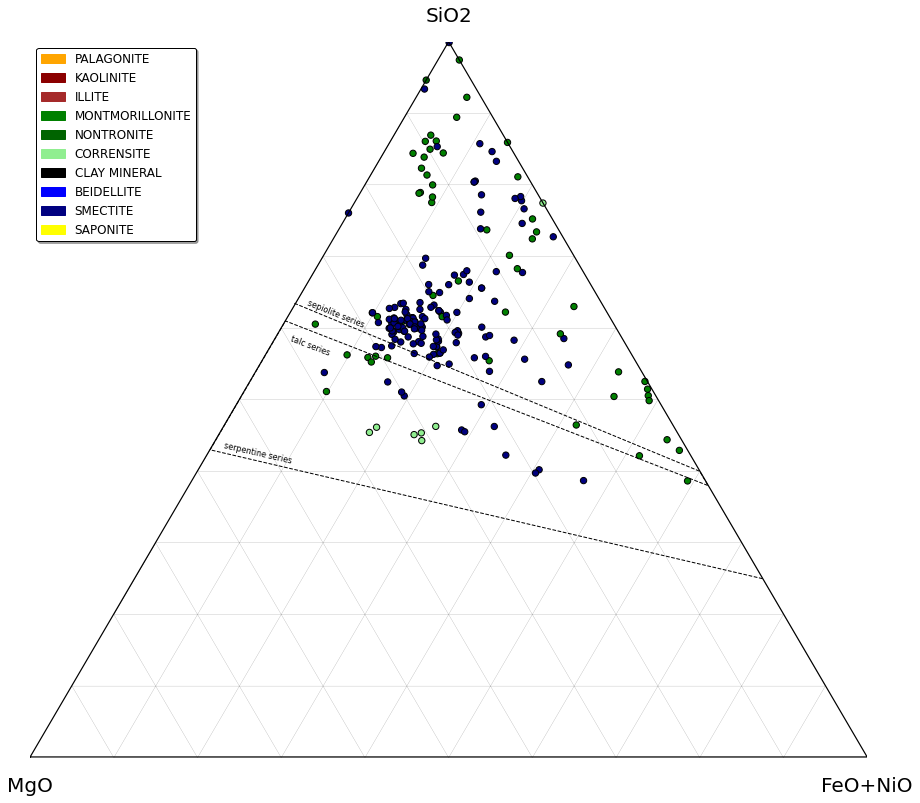

In [ ]:
legend = {'PALAGONITE': 'orange', 'KAOLINITE': 'darkred', 'ILLITE': 'brown', 'MONTMORILLONITE': 'green', 'NONTRONITE': 'darkgreen', 'CORRENSITE': 'lightgreen', 'CLAY MINERAL':'black', 'BEIDELLITE': 'blue', 'SMECTITE': 'navy', 'SAPONITE': 'yellow'}
ternary_plot(smec['MGO'], smec['FEO'], smec['SIO2'], 
                color = None, 
                non_num= smec['MINERAL'], 
                discrete_colors= legend, 
                barvar = None, 
                cmapcolor= None, 
                vmin= None, vmax = None, 
                label= None, 
                grid = True, 
                fields = 'mgsilicates', 
                frame = (15,15), 
                axis_label = ('MgO', 'FeO+NiO', 'SiO2'), 
                s = 40
                )

<Figure size 1080x948.267 with 0 Axes>

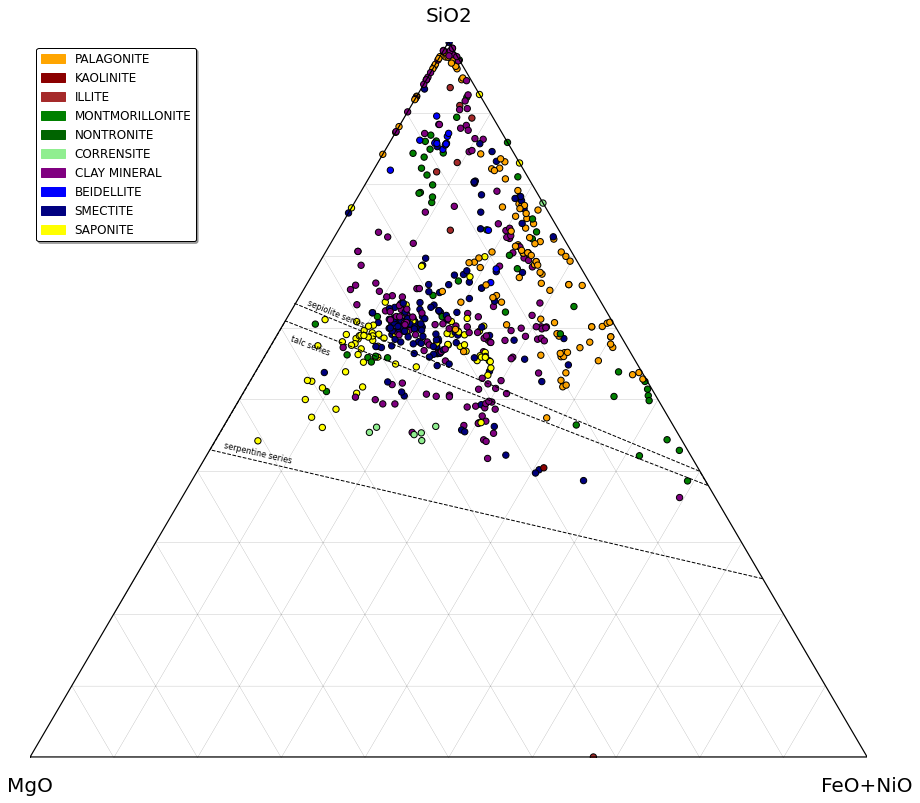

In [ ]:
legend = {'PALAGONITE': 'orange', 'KAOLINITE': 'darkred', 'ILLITE': 'brown', 'MONTMORILLONITE': 'green', 
'NONTRONITE': 'darkgreen', 'CORRENSITE': 'lightgreen', 'CLAY MINERAL':'purple', 'BEIDELLITE': 'blue', 'SMECTITE': 'navy', 'SAPONITE': 'yellow'}
ternary_plot(clay['MGO'], clay['FEO'], clay['SIO2'], 
                color = None, 
                non_num= clay['MINERAL'], 
                discrete_colors= legend, 
                barvar = None, 
                cmapcolor= None, 
                vmin= None, vmax = None, 
                label= None, 
                grid = True, 
                fields = 'mgsilicates', 
                frame = (15,15), 
                axis_label = ('MgO', 'FeO+NiO', 'SiO2'), 
                s = 40
                )

---

# PINiCo 1 Zeiss Mineralogic CHROMITES

In [23]:
chromites = pd.read_csv('C:\Repositories\Mineralogic_Exp_Data\chromite_500x350_APFU.csv')
chromites.head()

,Unnamed: 0,index,classification,Mg,Al,Si,Fe,Cr,Mn,Ni,Co,Ti,Cu,Ba,Ca
0,0,376174,Chromite,0.530536,1.111559,0.000000,0.640755,0.774789,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,376330,Chromite,0.000000,0.581954,0.000000,1.196595,1.287664,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,376160,Chromite,0.483050,0.944770,0.184755,0.846360,0.589240,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,74210,Chromite,0.864640,0.336043,0.373840,0.976580,0.604911,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,377633,Chromite,0.630858,0.432605,0.242454,1.008378,0.817323,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1008x695.396 with 0 Axes>

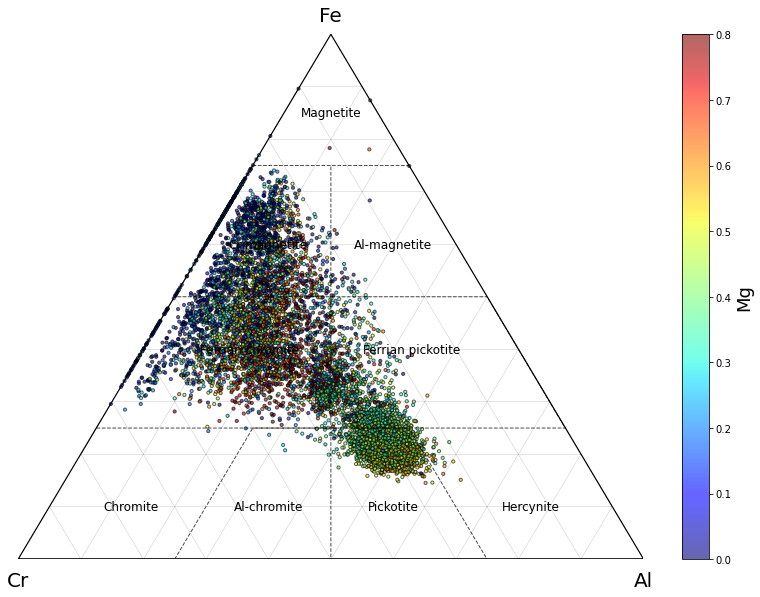

In [24]:
ternary_plot(chromites['Cr'], chromites['Al'], chromites['Fe'], 
             s = 10, alpha = 0.6,
             barvar=chromites['Mg'], 
             cmapcolor='jet', 
             fields = 'chromite',
             grid=True,
             frame= (12,11),
             vmax = 0.8, vmin = None)

In [34]:
filtro = chromites['Fe'] / (chromites['Fe'] + chromites['Al'] + chromites['Cr'])
filtro

magnetites = chromites[filtro > 0.5]

In [42]:
chromites.is_copy = False

for i in magnetites.index:
    chromites['classification'][chromites.index == i] = 'Magnetite'

set(chromites['classification'])

{'Chromite', 'Magnetite'}

In [45]:
chromites['index'][chromites['classification'] == 'Magnetite'].to_csv('C:\Repositories\Mineralogic_Exp_Data\magnetite_500x350_index.csv')

<Figure size 1008x695.396 with 0 Axes>

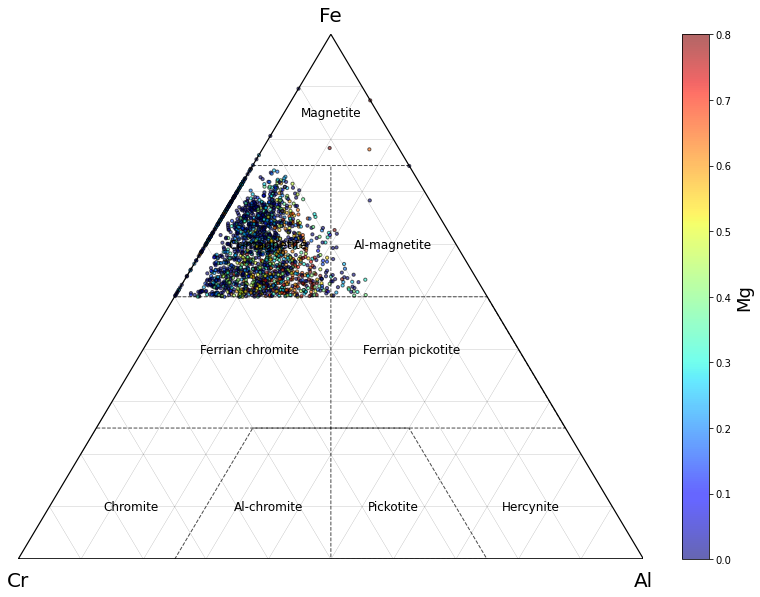

In [33]:
ternary_plot(magnetites['Cr'], magnetites['Al'], magnetites['Fe'], 
             s = 10, alpha = 0.6,
             barvar=magnetites['Mg'], 
             cmapcolor='jet', 
             fields = 'chromite',
             grid=True,
             frame= (12,11),
             vmax = 0.8, vmin = None)

# PINiCo 1 Zeiss Mineralogic SILICATES

In [6]:
silicates = pd.read_csv('C:\Repositories\Mineralogic_Exp_Data\silicates_500x350_APFU.csv')

In [38]:
X = silicates.copy()
X = X[X['Classification'] == 'Serpentine']
X.reset_index(inplace=True)

<Figure size 864x695.396 with 0 Axes>

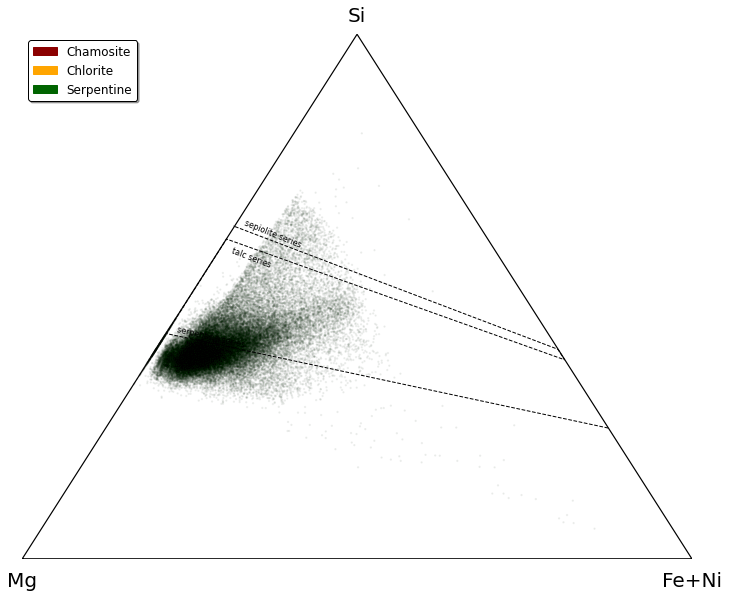

In [40]:
Y = X['Fe'] + X['Ni']

leg = {'Chamosite': 'darkred', 'Chlorite': 'orange', 'Serpentine': 'darkgreen'}

ternary_plot(x = X['Mg'], z = X['Si'], y = Y,
             s = 2, alpha = 0.05, 
             fields = 'mgsilicates',
             non_num = X.Classification,
             discrete_colors = leg,
             grid=False,
             frame= (12,11),
             vmax = None, vmin = None,
             axis_label=('Mg', 'Fe+Ni', 'Si'),
             )

In [41]:
C = silicates.copy()
C = C[C['Classification'] == 'Chlorite']

In [58]:
mask = (C.Fe != 0) & (C.Mg != 0) & (C.Si != 0) & (C.Al != 0) & (C.Ni != 0) 
C = C[mask]

### Log Fe, to test if cutting both tails build a better mean
Log, find mean and std, find upper and lower threshold (mean ± 2*std), filter the data to be within the threshold, recalculate mean, voilà. 

0.11985503091417553 0.6214805125222146


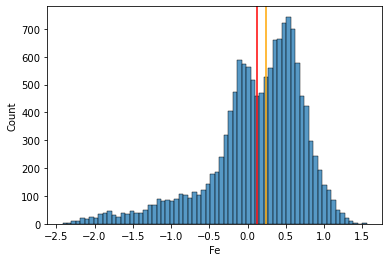

In [110]:
Felog = np.log(C.Fe)

import seaborn as sns

plt.figure()
sns.histplot(Felog)
plt.axvline(np.mean(Felog), color = 'r')
plt.axvline(Felog.median(), color = 'orange')

print(np.mean(Felog), np.std(Felog))

In [75]:
cut = 1.318271 + 2*0.655031
clt = 1.318271 - 2*0.655031

In [113]:
ut = np.exp(0.11985503091417553 + 2*0.6214805125222146)
lt = np.exp(0.11985503091417553 - 2*0.6214805125222146)


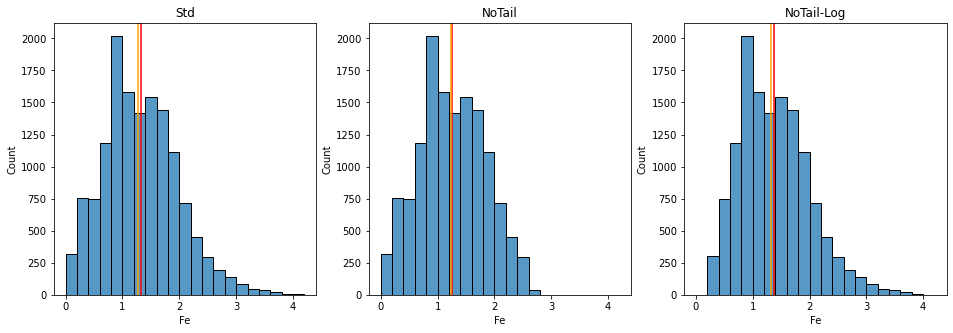

In [112]:
import matplotlib.pyplot as plt
X = [C.Fe, C.Fe[(C.Fe > clt) & (C.Fe < cut)], C.Fe[(C.Fe > lt) & (C.Fe < ut)]]
title = ['Std', 'NoTail', 'NoTail-Log']

plt.figure(figsize=(16,5))
for i, n in enumerate(X):
    plt.subplot(1,3,i+1)
    plt.title(title[i])
    sns.histplot(n, binwidth = 0.2, binrange=(0, 4.1))
    plt.axvline(np.mean(n), color = 'r')
    plt.axvline(n.median(), color = 'orange')